In [7]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [8]:
#使用numpy生成200个随机点
x_data =  np.linspace(-0.5,0.5,200)[:,np.newaxis]
noise = np.random.normal(0,0.02,x_data.shape)
y_data = np.square(x_data) + noise
#定义两个placeholder
x = tf.placeholder(tf.float32,[None,1])
y = tf.placeholder(tf.float32,[None,1])

In [9]:
# 定义神经网络中间层
Weights_L1  = tf.Variable(tf.random_normal([1,10]))
biases_L1 = tf.Variable(tf.zeros([1,10]))
Wx_plus_b_L1 =  tf.matmul(x,Weights_L1) + biases_L1  #先后不能搞混了
L1  = tf.nn.tanh(Wx_plus_b_L1)
# 定义输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

In [10]:
# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 使用梯度下降法训练
train_step = tf.train.GradientDescentOptimizer(0.3).minimize(loss)

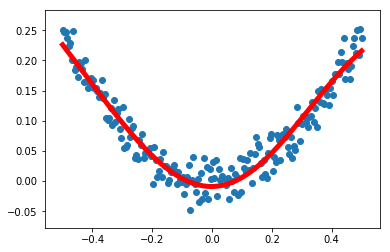

In [11]:
with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(2001):
        sess.run(train_step, feed_dict={x: x_data, y: y_data})
#         print(Weights_L1,biases_L1)
#         print(Weights_L2, biases_L2)
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x: x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)#样本点
    plt.plot(x_data, prediction_value, 'r-', lw=5)#红色，实线，线宽5
    plt.show()
